In [282]:
!pip install TableOne

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [283]:
#Basic imports
import numpy as np
import pandas as pd

#sklearn imports
from sklearn.decomposition import PCA #Principal Component Analysis
from sklearn.manifold import TSNE #T-Distributed Stochastic Neighbor Embedding
from sklearn.cluster import KMeans #K-Means Clustering
from sklearn.preprocessing import StandardScaler #used for 'Feature Scaling'

import matplotlib.pyplot as plt
import plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import sys
import seaborn as sns

from tableone import TableOne

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [284]:
!pip install pyclustering

from pyclustering.cluster.kmedoids import kmedoids
from pyclustering.cluster import cluster_visualizer
from pyclustering.utils import calculate_distance_matrix

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [285]:
from google.colab import files
import pandas as pd
import io

uploaded = files.upload()

import pandas as pd
import io

df_new = pd.read_csv(io.BytesIO(uploaded['complete_df (11).csv']))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Saving complete_df.csv to complete_df (11).csv


In [286]:
df = df_new.copy()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [287]:
df['readiness'].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



readiness
False    361
True     102
Name: count, dtype: int64

In [288]:
df['dod'] = pd.to_datetime(df['dod'])
df['outtime'] = pd.to_datetime(df['outtime'])


df_filtered = df[df['dod'].isna() | (df['dod'] >= df['outtime'])]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [289]:
df_cluster = df_filtered[['subject_id','stay_id', 'gender', 'los', 'anchor_age',
       'initial_vasopressor_needed_within_24hr',
       'initial_ventilation_within_6hr', 'initial_fio2_above_60_within_6hr',
       'initial_sodium', 'initial_wbc', 'initial_creatinine', 'initial_ph',
       'initial_lactate', 'initial_baseexcess', 'initial_glucose',
        'off_vasopressors', 'last_fio2_above_60',
       'off_ventilation', 'last_ph', 'last_lactate', 'last_baseexcess',
       'last_hemoglobin', 'last_creatinine', 'last_sodium', 'last_glucose',
       'last_wbc', 'readiness']]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [290]:
df = df_cluster.copy()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [291]:
df['initial_vasopressor_needed_within_24hr'] = df['initial_vasopressor_needed_within_24hr'].astype(int)
df['off_vasopressors'] = df['off_vasopressors'].astype(int)
df['initial_ventilation_within_6hr'] = df['initial_ventilation_within_6hr'].astype(int)
df['off_ventilation'] = df['off_ventilation'].astype(int)
df['readiness'] = df['readiness'].astype(int)
df['gender'] = df['gender'].replace({'M': 1, 'F': 0})

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [292]:
df.fillna(df.mean(), inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [293]:
features = df.drop(['gender', 'anchor_age', 'subject_id', 'stay_id'], axis=1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [294]:
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [295]:
tsne = TSNE(n_components=3, random_state=42)  # Setting n_components to 3 for 3D visualization
X_tsne = tsne.fit_transform(features_scaled)


kmeans = KMeans(n_clusters=2)
cluster_labels = kmeans.fit_predict(X_tsne)

df['Cluster'] = cluster_labels
fig = px.scatter_3d(
    x=X_tsne[:, 0], y=X_tsne[:, 1], z=X_tsne[:, 2],  # Coordinates for each point
    color=cluster_labels,  # Assuming 'y' is a vector of labels or a pandas series
    title="3D t-SNE visualization",
    labels={'x': "First t-SNE component", 'y': "Second t-SNE component", 'z': "Third t-SNE component"}
)

fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



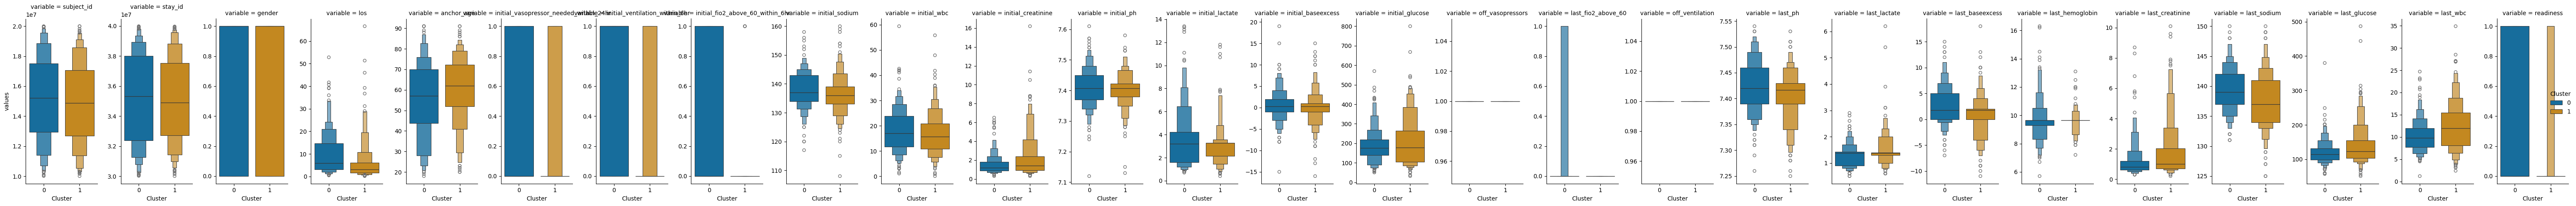

In [296]:
df_long = df.melt(id_vars='Cluster', value_vars=[col for col in df.columns if col != 'cluster_labels'], var_name='variable', value_name='values')

sns.catplot(kind='boxen', data=df_long, col='variable', y='values', x='Cluster', hue='Cluster', aspect=0.45, palette="colorblind", sharey=False)
#sns.factorplot(kind='box', data=df_long, col='variable', y='values', x='Cluster', hue='Cluster', palette="colorblind", sharey=False)

plt.tight_layout()

plt.Figure(figsize=(12, 5))
plt.show()


In [263]:
# normality test
from scipy.stats import shapiro
from scipy.stats import kstest
df2 = df2.drop(columns=['first_procedure', 'last_procedure'])
continuous_list = [col for col in df2.columns if (col not in categorical)]

for s in continuous_list:
  print(s)
  stat, p0 = shapiro(df2[s])
  print(s, p0)

subject_id
subject_id 5.489581678119748e-09
stay_id
stay_id 2.350621260138741e-11
los
los 7.471487138920446e-26
anchor_age
anchor_age 2.0879095785630852e-08
initial_sodium
initial_sodium 4.25480175181292e-06
initial_wbc
initial_wbc 5.720944273868156e-10
initial_creatinine
initial_creatinine 1.1313085827025618e-28
initial_ph
initial_ph 9.216508112253052e-11
initial_lactate
initial_lactate 2.152400353463927e-23
initial_baseexcess
initial_baseexcess 2.187599593863449e-15
initial_glucose
initial_glucose 9.041338039652646e-18
last_ph
last_ph 2.9604201756683324e-08
last_lactate
last_lactate 1.1761444752454416e-24
last_baseexcess
last_baseexcess 1.0632450475611677e-10
last_hemoglobin
last_hemoglobin 7.621680554521891e-27
last_creatinine
last_creatinine 2.717591272118008e-29
last_sodium
last_sodium 0.008207026869058609
last_glucose
last_glucose 1.92429648955384e-23
last_wbc
last_wbc 4.609485102641253e-12
Cluster
Cluster 3.064715769542949e-29
procedure_freq
procedure_freq 4.717807087761903e-34


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [271]:
df_dead = df[~df['dod'].isna() & (df['dod'] >= df['outtime'])]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [279]:
df_dead.columns

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Index(['subject_id', 'hadm_id', 'stay_id', 'first_careunit', 'last_careunit',
       'intime', 'outtime', 'los', 'anchor_age', 'gender', 'anchor_year',
       'dod', 'sepsis3', 'first_procedure', 'last_procedure', 'procedure_freq',
       'icu_stay_num', 'admission_num', 'in2first_days', 'first2out_days',
       'in2last_days', 'last2out_days', 'first2last_days', 'death',
       'initial_vasopressor_needed_within_24hr',
       'initial_ventilation_within_6hr', 'initial_fio2_above_60_within_6hr',
       'initial_sodium', 'initial_wbc', 'initial_creatinine', 'initial_ph',
       'initial_lactate', 'initial_baseexcess', 'initial_glucose',
       'initial_crp', 'off_vasopressors', 'last_fio2_above_60',
       'off_ventilation', 'last_ph', 'last_lactate', 'last_baseexcess',
       'last_hemoglobin', 'last_creatinine', 'last_sodium', 'last_glucose',
       'last_wbc', 'last_crp', 'readiness'],
      dtype='object')

In [298]:
columns = [col for col in df.columns if (col != 'cluster_labels' and col != 'subject_id' and col != 'stay_id')]
categorical = ['gender', 'initial_vasopressor_needed_within_24hr',
       'initial_ventilation_within_6hr', 'initial_fio2_above_60_within_6hr', 'off_vasopressors', 'last_fio2_above_60',
       'off_ventilation', 'readiness']
groupby = ['Cluster']
nonnormal = [col for col in columns if (col != 'last_sodium')]
mytable = TableOne(df, columns=columns, categorical=categorical, groupby=groupby, nonnormal=nonnormal, pval=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [299]:
print(mytable.tabulate(tablefmt = 'fancy_grid'))

╒════════════════════════════════════════════════════════╤═══════╤═══════════╤═════════════════════╤═════════════════════╤═════════════════════╤═══════════╕
│                                                        │       │ Missing   │ Overall             │ 0                   │ 1                   │ P-Value   │
╞════════════════════════════════════════════════════════╪═══════╪═══════════╪═════════════════════╪═════════════════════╪═════════════════════╪═══════════╡
│ n                                                      │       │           │ 432                 │ 220                 │ 212                 │           │
├────────────────────────────────────────────────────────┼───────┼───────────┼─────────────────────┼─────────────────────┼─────────────────────┼───────────┤
│ gender, median [Q1,Q3]                                 │ 0     │ 0         │ 153 (35.4)          │ 74 (33.6)           │ 79 (37.3)           │ 0.492     │
├────────────────────────────────────────────────────────┼

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [257]:
df2 = df.merge(df_new[['stay_id', 'first_procedure', 'last_procedure', 'procedure_freq',
       'icu_stay_num', 'admission_num', 'in2first_days', 'first2out_days',
       'in2last_days', 'last2out_days', 'first2last_days', 'death']], how='left', on=['stay_id']).copy()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [147]:
# random forest
df_f = df.copy()
df_f['initial_vasopressor_needed_within_24hr'] = df['initial_vasopressor_needed_within_24hr'].astype(int)
df_f['off_vasopressors'] = df['off_vasopressors'].astype(int)
df_f['initial_ventilation_within_6hr'] = df['initial_ventilation_within_6hr'].astype(int)
df_f['off_ventilation'] = df['off_ventilation'].astype(int)
df_f['readiness'] = df['readiness'].astype(int)
df_f = df_f[['subject_id','stay_id', 'los',
       'initial_vasopressor_needed_within_24hr',
       'initial_ventilation_within_6hr', 'initial_fio2_above_60_within_6hr',
       'initial_sodium', 'initial_wbc', 'initial_creatinine', 'initial_ph',
       'initial_lactate', 'initial_baseexcess', 'initial_glucose',
       'initial_crp', 'off_vasopressors', 'last_fio2_above_60',
       'off_ventilation', 'last_ph', 'last_lactate', 'last_baseexcess',
       'last_hemoglobin', 'last_creatinine', 'last_sodium', 'last_glucose',
       'last_wbc', 'last_crp', 'readiness']].copy()


df_f.fillna(df_f.mean(), inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [138]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [161]:

from sklearn.metrics import auc, roc_curve
X = df_f.drop(['los', 'subject_id', 'stay_id','initial_crp','last_crp'], axis=1)  # Exclude identifiers and target
y = df_f['los']

X.fillna(X.mean(), inplace=True)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Create and fit the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predicting the Test set results
y_pred = model.predict(X_test)
#y_pred_prob = model.predict_proba(X_test)
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)

print(f'Mean Squared Error: {mse}')

#fpr_brf, tpr_brf, thresholds = roc_curve(y_test, y_pred, pos_label=1)
#roc_auc_brf = auc(fpr_brf, tpr_brf)



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Mean Squared Error: 80.72060145721237


In [163]:
y_test.describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



count    232.000000
mean       8.615413
std        9.584953
min        0.184641
25%        2.402535
50%        5.010700
75%       11.814433
max       66.584236
Name: los, dtype: float64

In [162]:
y_pred.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



(232,)

In [ ]:
roc_auc = roc_auc_score(y_test, y_pred)
roc_auc

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



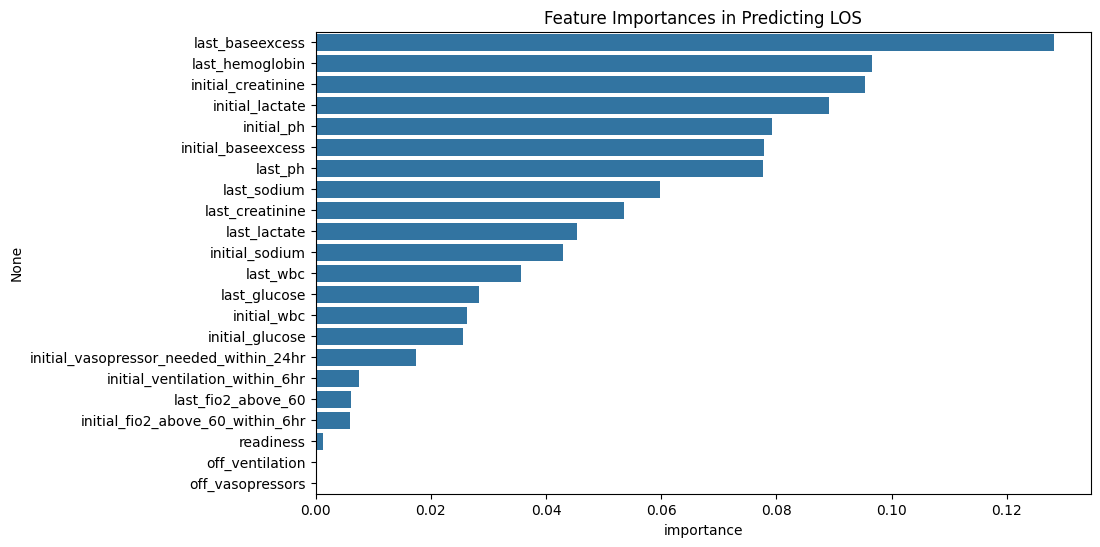

In [154]:
feature_importances = pd.DataFrame(model.feature_importances_,
                                   index = X_train.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y=feature_importances.index, data=feature_importances)
plt.title('Feature Importances in Predicting LOS')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



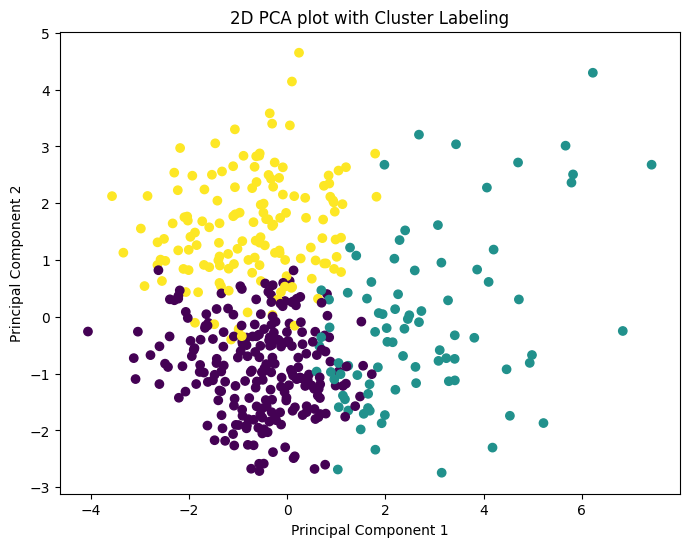

In [30]:



# Other approaches

# Run PCA for dimensionality reduction for visualization (if desired)
pca = PCA(n_components=2)
principal_components = pca.fit_transform(features_scaled)
principal_df = pd.DataFrame(data=principal_components, columns=['principal_component_1', 'principal_component_2'])

kmeans = KMeans(n_clusters=3)  # Choose the number of clusters
cluster_labels = kmeans.fit_predict(features_scaled)

df['Cluster'] = cluster_labels
principal_df['Cluster'] = cluster_labels

plt.figure(figsize=(8, 6))
plt.scatter(principal_df['principal_component_1'], principal_df['principal_component_2'], c=principal_df['Cluster'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D PCA plot with Cluster Labeling')
plt.show()

In [33]:
fig_kmeans = px.box(df, x='Cluster', y='initial_creatinine',
                    title='Initial Creatinine Levels Distribution by KMeans Clusters',
                    labels={'Cluster': 'KMeans Cluster'})
fig_kmeans.show()

In [31]:
import plotly.express as px

# Assuming 'principal_df' is your DataFrame containing PCA results and 'Cluster' labels
fig_pca = px.scatter(principal_df, x='principal_component_1', y='principal_component_2',
                     color='Cluster',
                     title='PCA Results with Cluster Labels',
                     labels={'principal_component_1': 'Principal Component 1', 'principal_component_2': 'Principal Component 2'})
fig_pca.show()

In [35]:
distance_matrix = calculate_distance_matrix(features_scaled)

# Choose initial medoids. For this example, we'll pick random indexes as medoids
initial_medoids = [1, 10, 20]

# Create instance of K-Medoids algorithm
kmedoids_instance = kmedoids(distance_matrix, initial_medoids, data_type='distance_matrix')

# Run cluster analysis and obtain results
kmedoids_instance.process()
clusters = kmedoids_instance.get_clusters()
medoids = kmedoids_instance.get_medoids()

# You can now assign the cluster labels to your original dataframe
cluster_labels = [0] * len(df)
for cluster_id, cluster in enumerate(clusters):
    for index in cluster:
        cluster_labels[index] = cluster_id

df['KMedoids_Cluster'] = cluster_labels

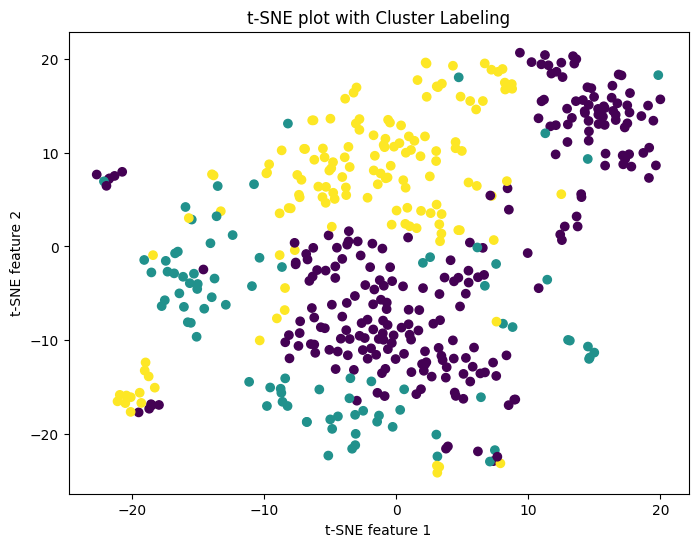

In [32]:
from sklearn.manifold import TSNE

# Run t-SNE
tsne = TSNE(n_components=2, perplexity=30, n_iter=1000)
tsne_results = tsne.fit_transform(features_scaled)

# Create a DataFrame to plot
tsne_df = pd.DataFrame(data=tsne_results, columns=['TSNE1', 'TSNE2'])
tsne_df['Cluster'] = cluster_labels  # Use the cluster labels from KMeans or KMedoids

# Plot the t-SNE results with cluster labels
plt.figure(figsize=(8, 6))
plt.scatter(tsne_df['TSNE1'], tsne_df['TSNE2'], c=tsne_df['Cluster'])
plt.xlabel('t-SNE feature 1')
plt.ylabel('t-SNE feature 2')
plt.title('t-SNE plot with Cluster Labeling')
plt.show()

In [36]:
from sklearn.manifold import TSNE
import plotly.express as px

# Let's assume 'features_scaled' is your scaled dataset ready for t-SNE
# Perform t-SNE dimensionality reduction to 3 components
tsne_3d = TSNE(n_components=3, perplexity=30, n_iter=3000, random_state=42)
tsne_3d_results = tsne_3d.fit_transform(features_scaled)

# Create a DataFrame containing the t-SNE results and cluster labels
tsne_3d_df = pd.DataFrame(data=tsne_3d_results, columns=['TSNE1', 'TSNE2', 'TSNE3'])
tsne_3d_df['Cluster'] = cluster_labels

# Visualize with Plotly
fig_3d = px.scatter_3d(tsne_3d_df, x='TSNE1', y='TSNE2', z='TSNE3',
                        color='Cluster', labels={'Cluster': 'Cluster Label'},
                        title='3D t-SNE Results with Cluster Labels')
fig_3d.update_traces(marker=dict(size=3))
fig_3d.show()